In [1]:
from MLpipeline.data_cleaning import build_data_frame
from MLpipeline.s3_data_ingestion import download_data #for when storing data through AWS - Amazon S3 bucket
from MLpipeline.preprocessing import preprocessor
from MLpipeline.train_model import train
from MLpipeline.predict import model_predictions
# from MLpipeline.write_df_to_bucket import writeDF

import numpy as np
import pandas as pd

### Using an S3 bucket with access codes and a bucket location

In [2]:
# df = download_data(access_file='portfolio-access_accessKeys.csv',bucket='portfolio-overview-ns25',object_key='data/nba_totals_agg.csv', region='us-east-1')

In [3]:
# df_totals, df_aggregated = build_data_frame("data_files")
# df_aggregated.head()

# Total feature and target data with label encoder

X - features - player season statistics

y - target - player position

le - label encoder to label nominal variables as integers

In [4]:
per36 = pd.read_csv(r'data_files\df_per36.csv')

In [5]:
X,y,le = preprocessor(per36)

In [6]:
model, X_train, y_train, X_val, y_val, X_test, y_test = train(X,y, 'xgb_model_per36_v1.joblib')

Predictions saved to: output_per36\predictions.csv
Precision (macro): 0.5885580831769855
Recall (macro): 0.581794735912383
F1 Score (macro): 0.5798955665803753
Precision (weighted): 0.5855088043308317

Classification Report:
               precision    recall  f1-score   support

           C       0.77      0.83      0.80        36
          PF       0.44      0.45      0.44        40
          PG       0.73      0.59      0.66        37
          SF       0.42      0.31      0.35        36
          SG       0.58      0.73      0.64        51

    accuracy                           0.59       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.59      0.59      0.58       200



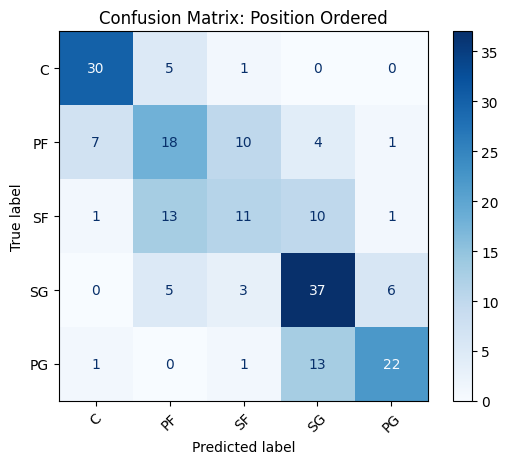

In [7]:
y_proba, predictions_df = model_predictions(model, X_test,y_test,le, save_dir=r'output_per36')

C:\Users\nick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


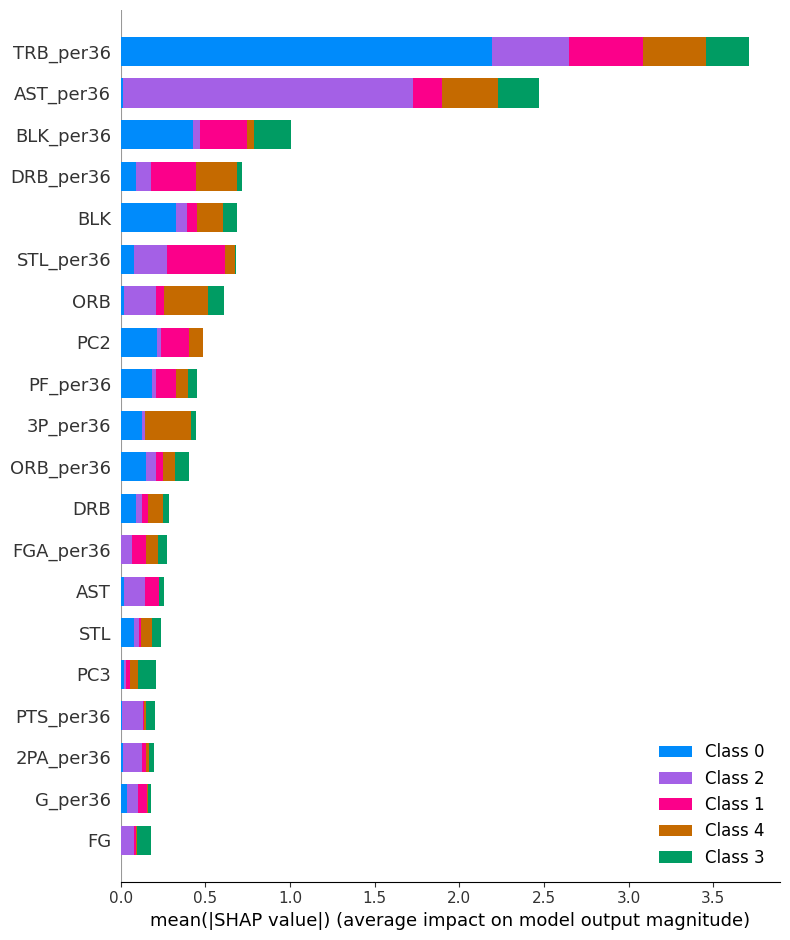

In [8]:
import shap

# Optional: silence warnings
import warnings
warnings.filterwarnings("ignore")

# Step 1: Create SHAP explainer
explainer = shap.Explainer(model)

# Step 2: Compute SHAP values
shap_values = explainer(X_test)

# Step 3: Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)